In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [382]:
data = pd.read_csv('HR Employee Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [383]:
# 고유값 1개인 데이터 삭제
for col in data.columns:
    if data[col].unique().size == 1:
        print(data[col].unique())
        data.drop(col, axis=1, inplace=True)
data.head()

[1]
['Y']
[80]


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [384]:
change_dict = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
data.replace({'Education': change_dict}, inplace=True)
data['Education'].unique()

change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'EnvironmentSatisfaction': change_dict}, inplace=True)
data['EnvironmentSatisfaction'].unique()

change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'JobInvolvement': change_dict}, inplace=True)
data['JobInvolvement'].unique()

change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'JobSatisfaction': change_dict}, inplace=True)
data['JobSatisfaction'].unique()

change_dict = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
data.replace({'PerformanceRating': change_dict}, inplace=True)
data['PerformanceRating'].unique()

change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'RelationshipSatisfaction': change_dict}, inplace=True)
data['RelationshipSatisfaction'].unique()

change_dict = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
data.replace({'WorkLifeBalance': change_dict}, inplace=True)
data['WorkLifeBalance'].unique()

data = data.astype({'JobLevel': object, 'StockOptionLevel': object, 'NumCompaniesWorked': object})
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Low,...,Excellent,Very High,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,2061,High,...,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,2062,Very High,...,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,2064,Medium,...,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,2065,Very High,...,Excellent,Very High,0,17,3,Good,9,6,0,8


In [385]:
data['EmployeeNumber'].unique().size

1470

In [386]:
data.drop('EmployeeNumber', axis=1, inplace=True)

In [387]:
data.shape

(1470, 31)

<h1>VIF 확인</h1>

In [388]:
data_cp = data.copy()
data_cp = pd.get_dummies(data_cp, drop_first= True)
data_cp = data_cp[['Attrition_Yes'] + [column for column in data_cp.columns if column != 'Attrition_Yes']]
data_corr = data_cp.corr()

In [389]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_corr.values, i) for i in range(data_corr.shape[1])]
vif["features"] = data_corr.columns
vif.sort_values(by='VIF Factor', ascending = False)

,VIF Factor,features
17,13640.716455,Department_Sales
16,13522.448575,Department_Research & Development
22,3238.702786,EducationField_Life Sciences
5,3212.315104,MonthlyIncome
24,2882.516493,EducationField_Medical
...,...,...
2,1.447858,DailyRate
6,1.379119,MonthlyRate
4,1.349891,HourlyRate
30,1.328611,Gender_Male


In [390]:
#VIF가 과도하게 높은 Department컬럼 삭제
data.drop('Department', axis=1, inplace=True)

<h1>가설검정 결과 전처리</h1>

In [391]:
# 나이 컬럼 범주화 (연령대별)
data['Age_cut'] = pd.cut(data['Age'], 5, labels=[0, 1, 2, 3, 4]).astype(object)
data['Age_cut'].head()
# data.drop('Age', axis=1, inplace=True)

0    2
1    3
2    2
3    1
4    1
Name: Age_cut, dtype: object

In [392]:
# 집 근처 거리가 22 이상인 경우 1, 아닌 경우 0으로 변경
round(data[data.DistanceFromHome >= 22]['DistanceFromHome'].count() / len(data),2)
data['FarFromHome'] = np.where(data.DistanceFromHome >= 22 , 1, 0)
data['FarFromHome'] = data['FarFromHome'].astype(object)

In [393]:
# 월 급여가 중앙값보다 낮은 경우 1, 아닌 경우 0으로 변경
data[data['Attrition'] == 'Yes']['MonthlyIncome'].median()
data['LowMonthlyIncome'] = np.where(data.MonthlyIncome <= 3202 , 1, 0)
data['LowMonthlyIncome'] = data['LowMonthlyIncome'].astype(object)

In [394]:
# 초기 경력자여부(2년이하) 컬럼 생성
data['LowWorkingYears'] = np.where(data.TotalWorkingYears <= 2 , 1, 0)
data['LowWorkingYears'] = data['LowWorkingYears'].astype(object)

<h1>데이터 분석 중 이상 컬럼 전처리</h1>
<h3> NumCompaniesWorked</h3>

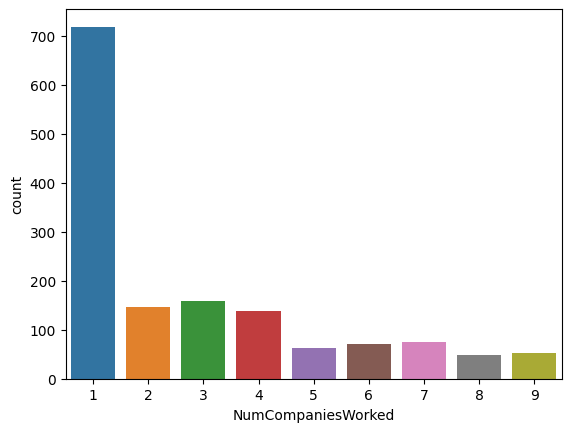

In [395]:
# 일한 회사 수 0 -> 1로 변경
data.NumCompaniesWorked.replace(0, 1, inplace = True)
data['NumCompaniesWorked'].head()
sns.countplot(data=data, x = 'NumCompaniesWorked')
data.NumCompaniesWorked = data.NumCompaniesWorked.astype(object)

<h1>기타 데이터 전처리</h1>

In [396]:
# 나이 컬럼 범주화 (연령대별)
data['Age_cut'] = pd.cut(data['Age'], 5, labels=[0, 1, 2, 3, 4]).astype(object)
data['Age_cut'].head()
data.drop('Age', axis=1, inplace=True)

In [397]:
# '만족도'와 관련된 컬럼 한 개로 통합
point = {'Low' : 0, 'Medium' : 1, 'High' : 2 , 'Very High' : 3}
EnvironmentSatisfaction = data['EnvironmentSatisfaction'].map(point)
RelationshipSatisfaction = data['RelationshipSatisfaction'].map(point)
JobSatisfaction = data['JobSatisfaction'].map(point)
data['TotalSatisfaction'] = (EnvironmentSatisfaction + RelationshipSatisfaction + JobSatisfaction).astype(object) 
data['TotalSatisfaction'].head()

0    4
1    6
2    6
3    7
4    4
Name: TotalSatisfaction, dtype: object

In [398]:
data.drop(['EnvironmentSatisfaction', 'RelationshipSatisfaction', 'JobSatisfaction'], axis=1, inplace=True)

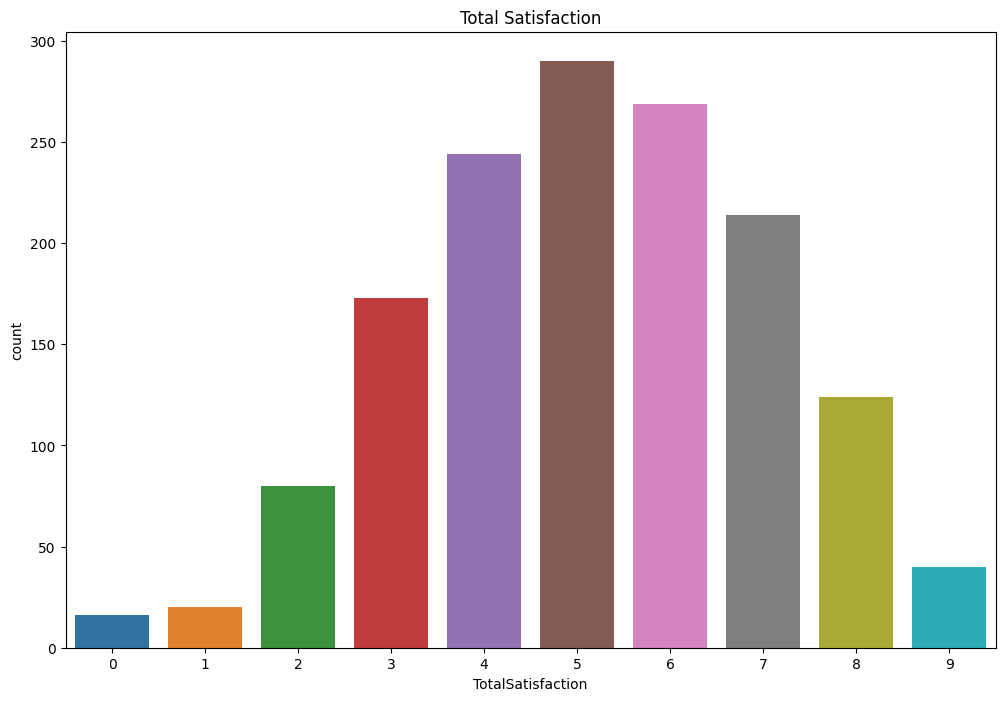

In [399]:
plt.figure(figsize=(12, 8))
plt.title('Total Satisfaction')
sns.countplot(data = data, x = 'TotalSatisfaction')
plt.show()

<h1>이상치 제거</h1>

In [400]:
# 아웃라이어 확인 함수 정의
def outlier(data, col):
    q1 = np.percentile(data[col], 25) 
    q3 = np.percentile(data[col], 75)
    IQR = q3 - q1
    outlier_step = 1.5 * IQR
    return data[(data[col] < q1 - outlier_step) | (data[col] > q3 + outlier_step)]

MonthlyIncome의 아웃라이어 갯수 114개
전체 데이터의 0.08% 차지
Attrition
No     109
Yes      5
Name: count, dtype: int64


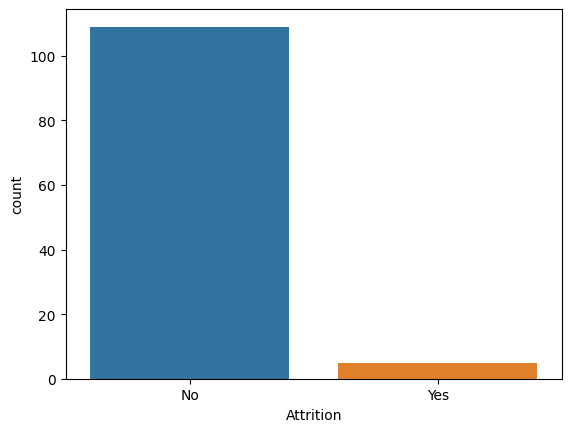

In [401]:
# MonthlyIncome의 아웃라이어 확인
monthlyincom_outlier = outlier(data, 'MonthlyIncome')
print(f'MonthlyIncome의 아웃라이어 갯수 {monthlyincom_outlier.shape[0]}개')
print(f'전체 데이터의 {round(monthlyincom_outlier.shape[0] / data.shape[0],2)}% 차지')
print(monthlyincom_outlier.Attrition.value_counts())
sns.countplot(data = monthlyincom_outlier, x = 'Attrition')
plt.show()

In [402]:
# MonthlyIncome의 아웃라이어가 많고, VIF가 높음
# 컬럼 삭제 결정
data.drop('MonthlyIncome', axis=1, inplace=True)

TotalWorkingYears의 아웃라이어 갯수 63개
전체 데이터의 0.04% 차지
Attrition
No     58
Yes     5
Name: count, dtype: int64


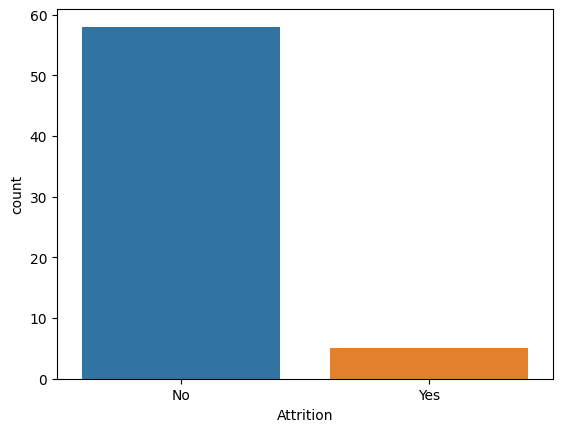

In [403]:
# TotalWorkingYears의 아웃라이어 확인
workingyear_outlier = outlier(data, 'TotalWorkingYears')
print(f'TotalWorkingYears의 아웃라이어 갯수 {workingyear_outlier.shape[0]}개')
print(f'전체 데이터의 {round(workingyear_outlier.shape[0] / data.shape[0],2)}% 차지')
print(workingyear_outlier.Attrition.value_counts())
sns.countplot(data = workingyear_outlier, x = 'Attrition')
plt.show()

In [404]:
# 아웃라이어가 많진 않으나, VIF가 높음
# 컬럼 삭제
data.drop('TotalWorkingYears', axis=1, inplace=True) 

TrainingTimesLastYear의 아웃라이어 갯수 238개
전체 데이터의 0.16% 차지
Attrition
No     203
Yes     35
Name: count, dtype: int64


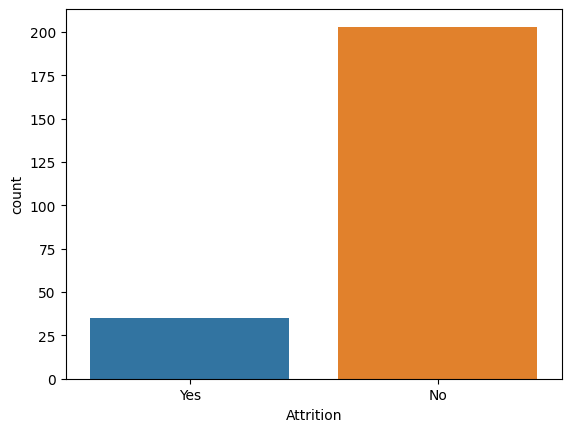

In [405]:
traininigtimes_outlier = outlier(data, 'TrainingTimesLastYear')
print(f'TrainingTimesLastYear의 아웃라이어 갯수 {traininigtimes_outlier.shape[0]}개')
print(f'전체 데이터의 {round(traininigtimes_outlier.shape[0] / data.shape[0],2)}% 차지')
print(traininigtimes_outlier.Attrition.value_counts())
sns.countplot(data = traininigtimes_outlier, x='Attrition')
plt.show()
# VIF계수 낮음, 아웃라이어가 전체 데이터 많은양 차이
# 컬럼과 아웃라이어 둘 다 유지

YearsAtCompany의 아웃라이어 갯수 104개
전체 데이터의 0.07% 차지
Attrition
No     94
Yes    10
Name: count, dtype: int64


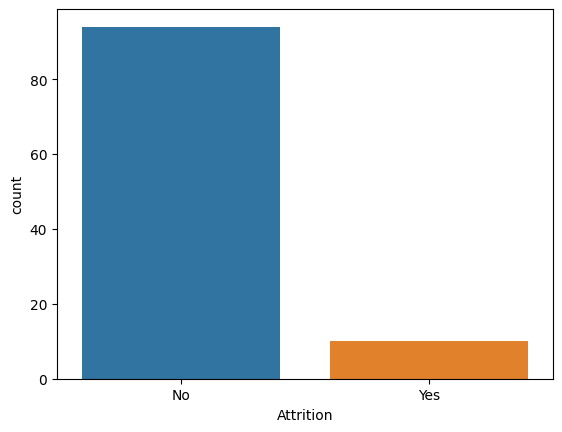

In [406]:
# 아웃라이어가 전체데이터 0.07% 차지 (많은 편)
# 해당 컬럼이 퇴사에 영향을 미칠 것으로 예상됨
# 아웃라이어만 제거
yearsatcompany_outlier = outlier(data, 'YearsAtCompany')
print(f'YearsAtCompany의 아웃라이어 갯수 {yearsatcompany_outlier.shape[0]}개')
print(f'전체 데이터의 {round(yearsatcompany_outlier.shape[0] / data.shape[0],2)}% 차지')
print(yearsatcompany_outlier.Attrition.value_counts())
sns.countplot(data = yearsatcompany_outlier, x='Attrition')
plt.show()

YearsInCurrentRole의 아웃라이어 갯수 21개
전체 데이터의 0.01% 차지
Attrition
No     19
Yes     2
Name: count, dtype: int64


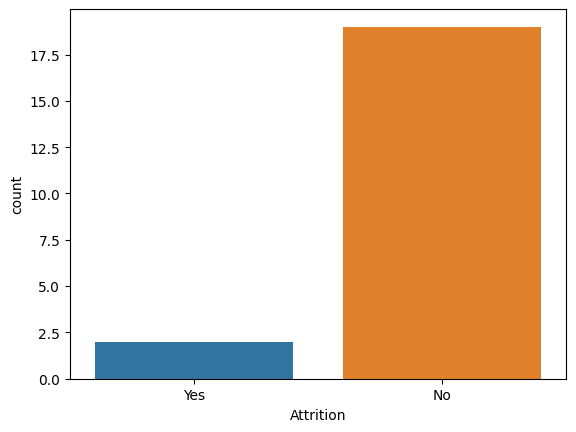

In [407]:
# VIF계수가 낮고 아웃라이어 수 적음
# 아웃라이어만 삭제
yearsincurrentrole_outlier = outlier(data, 'YearsInCurrentRole')
print(f'YearsInCurrentRole의 아웃라이어 갯수 {yearsincurrentrole_outlier.shape[0]}개')
print(f'전체 데이터의 {round(yearsincurrentrole_outlier.shape[0] / data.shape[0],2)}% 차지')
print(yearsincurrentrole_outlier.Attrition.value_counts())
sns.countplot(data = yearsincurrentrole_outlier, x='Attrition')
plt.show()

YearsSinceLastPromotion의 아웃라이어 갯수 107개
전체 데이터의 0.07% 차지
Attrition
No     94
Yes    13
Name: count, dtype: int64


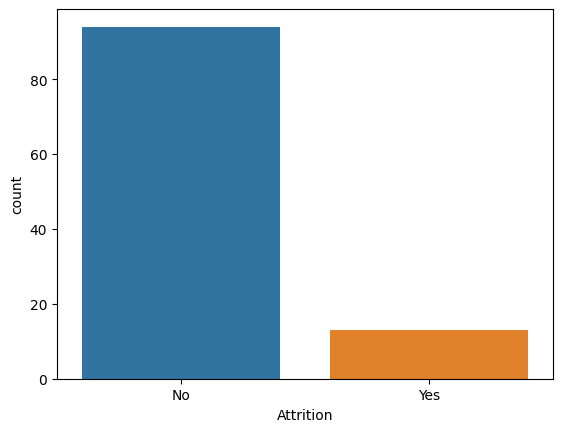

In [408]:
# 아웃라이어가 많고, VIF높음
# 유지
yearssincelastpromotion_outlier = outlier(data, 'YearsSinceLastPromotion')
print(f'YearsSinceLastPromotion의 아웃라이어 갯수 {yearssincelastpromotion_outlier.shape[0]}개')
print(f'전체 데이터의 {round(yearssincelastpromotion_outlier.shape[0] / data.shape[0],2)}% 차지')
print(yearssincelastpromotion_outlier.Attrition.value_counts())
sns.countplot(data = yearssincelastpromotion_outlier, x='Attrition')
plt.show()

YearsWithCurrManager의 아웃라이어 갯수 14개
전체 데이터의 0.01% 차지
Attrition
No    14
Name: count, dtype: int64


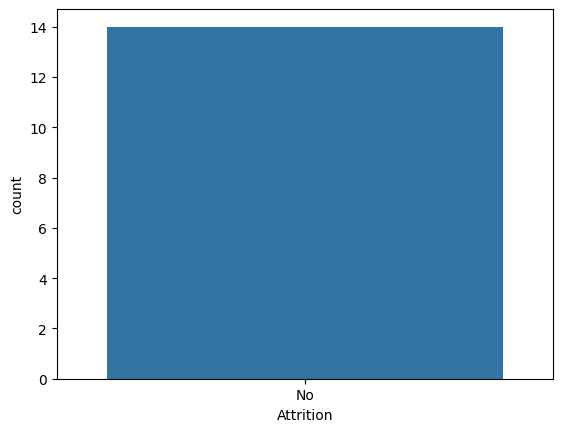

In [409]:
# VIF 낮음
# 아웃라이어가 적긴하지만, 모두 NO값을 가져 의미가 있을 것으로 예상됨
# 유지
yearswithcurrmanager_outlier = outlier(data, 'YearsWithCurrManager')
print(f'YearsWithCurrManager의 아웃라이어 갯수 {yearswithcurrmanager_outlier.shape[0]}개')
print(f'전체 데이터의 {round(yearswithcurrmanager_outlier.shape[0] / data.shape[0],2)}% 차지')
print(yearswithcurrmanager_outlier.Attrition.value_counts())
sns.countplot(data = yearswithcurrmanager_outlier, x='Attrition')
plt.show()

In [410]:
outlier_df = pd.concat([yearsatcompany_outlier, yearsincurrentrole_outlier]).drop_duplicates()
data.drop(outlier_df.index, axis=0, inplace=True)

In [415]:
data.shape

(1361, 29)

In [417]:
data.to_csv('HR_Analytics_preprocessing.csv', index=False)